In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress, pearsonr
import plotly.express as px

## Defending 

In [53]:
defending = pd.read_csv('team/defensive_premier_league_stats.csv')
defending = defending.drop(columns=['Unnamed: 0'])
defending.index = defending.index + 1
defending 

,Squad,Position,TklW#,Tkl%#,Att 3rd#,Int#,Err#,90s,Tkl,TklW,...,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
1,Arsenal,2,15,7,2,19,1,38.0,568,343,...,509,48.9,260,362,86,276,237,805,599,23
2,Chelsea,12,2,3,4,10,2,38.0,740,445,...,656,50.8,323,466,108,358,341,1081,661,21
3,Tottenham,8,13,11,14,13,3,38.0,619,353,...,574,47.9,299,428,148,280,340,959,762,20
4,Liverpool,5,11,18,3,14,4,38.0,590,370,...,648,43.4,367,350,74,276,333,923,568,20
5,Wolves,13,10,15,17,18,5,38.0,661,370,...,609,47.0,323,497,175,322,279,940,817,19
6,Leeds United,19,1,13,1,3,6,38.0,840,480,...,863,47.7,451,536,131,405,392,1232,734,18
7,Everton,17,4,5,9,4,7,38.0,708,424,...,611,50.6,302,510,180,330,390,1098,874,17
8,Fulham,10,14,2,6,12,8,38.0,625,350,...,585,51.1,286,455,125,330,340,965,749,15
9,Brighton,6,16,14,5,17,9,38.0,616,340,...,561,47.4,295,392,104,288,303,919,432,15
10,Brentford,9,18,20,10,11,10,38.0,587,337,...,599,42.2,346,456,168,288,341,928,822,14


## Tackles

In [54]:
tackles = defending.sort_values(by='Tkl', ascending=False)
tackles.reset_index(drop=True, inplace=True)
tackles.index = tackles.index + 1
tackles.loc[:5, ['Squad', 'Tkl']]

,Squad,Tkl
1,Leeds United,840
2,Chelsea,740
3,Southampton,713
4,Everton,708
5,Leicester City,700


## Tackels Won

In [55]:
tackles_won = defending.sort_values(by='TklW', ascending=False)
tackles_won.reset_index(drop=True, inplace=True)
tackles_won.index = tackles_won.index + 1
tackles_won.loc[:5, ['Squad', 'TklW']]

,Squad,TklW
1,Leeds United,480
2,Chelsea,445
3,Southampton,426
4,Everton,424
5,Crystal Palace,421


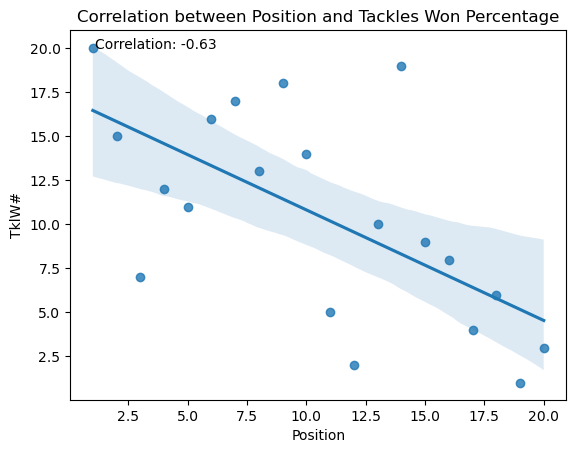

In [56]:
correlation = defending['Position'].corr(defending['TklW#'])

sns.regplot(x='Position', y='TklW#', data=defending)

plt.xlabel('Position')
plt.ylabel('TklW#')
plt.title('Correlation between Position and Tackles Won Percentage')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()


In [57]:
tackles_won.tail(5)[['Squad', 'Err']]

,Squad,Err
16,Brighton,15
17,Aston Villa,14
18,Brentford,14
19,West Ham,10
20,Manchester City,9


## Tackle Success Rate

In [58]:
tackles_succes = defending.sort_values(by='Tkl%', ascending=False)
tackles_succes.reset_index(drop=True, inplace=True)
tackles_succes.index = tackles_succes.index + 1
tackles_succes.loc[:5, ['Squad', 'Tkl%']]

,Squad,Tkl%
1,Crystal Palace,52.8
2,Fulham,51.1
3,Chelsea,50.8
4,Nott'ham Forest,50.7
5,Everton,50.6


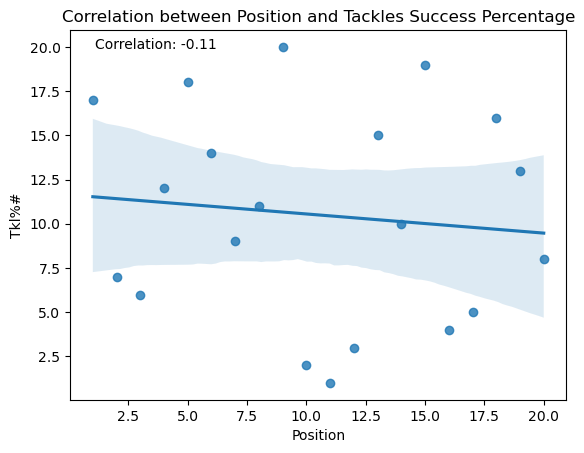

In [59]:
correlation = defending['Position'].corr(defending['Tkl%#'])

sns.regplot(x='Position', y='Tkl%#', data=defending)

plt.xlabel('Position')
plt.ylabel('Tkl%#')
plt.title('Correlation between Position and Tackles Success Percentage')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()

## Tackles in the Attacking Third

In [60]:
tackles_att3rd = defending.sort_values(by='Att 3rd', ascending=False)
tackles_att3rd.reset_index(drop=True, inplace=True)
tackles_att3rd.index = tackles_att3rd.index + 1
tackles_att3rd.loc[:5, ['Squad', 'Att 3rd']]

,Squad,Att 3rd
1,Leeds United,121
2,Arsenal,118
3,Liverpool,112
4,Chelsea,110
5,Brighton,104


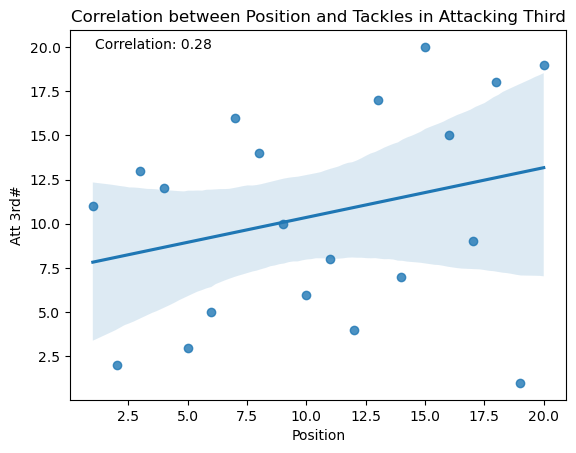

In [61]:
correlation = defending['Position'].corr(defending['Att 3rd#'])

sns.regplot(x='Position', y='Att 3rd#', data=defending)

plt.xlabel('Position')
plt.ylabel('Att 3rd#')
plt.title('Correlation between Position and Tackles in Attacking Third')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot

plt.show()

## Interceptions

In [62]:
interceptions = defending.sort_values(by='Int', ascending=False)
interceptions.reset_index(drop=True, inplace=True)
interceptions.index = interceptions.index + 1
interceptions.loc[:5, ['Squad', 'Int']]

,Squad,Int
1,Southampton,428
2,West Ham,408
3,Leeds United,392
4,Everton,390
5,Leicester City,367


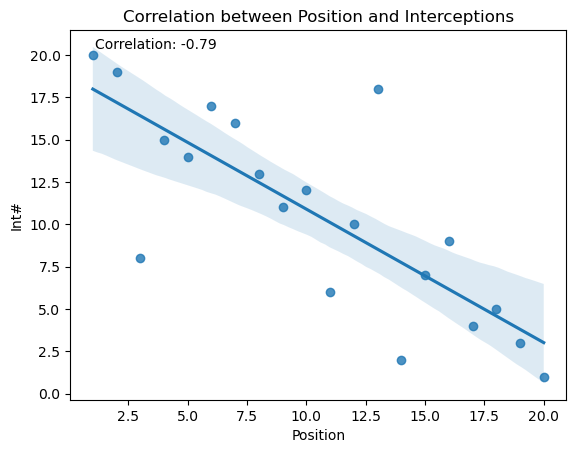

In [63]:
correlation = defending['Position'].corr(defending['Int#'])

sns.regplot(x='Position', y='Int#', data=defending)

plt.xlabel('Position')
plt.ylabel('Int#')
plt.title('Correlation between Position and Interceptions')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()

## Errors Leading to Goals

In [64]:
errors = defending.sort_values(by='Err', ascending=False)
errors.reset_index(drop=True, inplace=True)
errors.index = errors.index + 1
errors.loc[:5, ['Squad', 'Err']]

,Squad,Err
1,Arsenal,23
2,Chelsea,21
3,Tottenham,20
4,Liverpool,20
5,Wolves,19


In [65]:
errors.tail(5)[['Squad', 'Err']]

,Squad,Err
16,West Ham,10
17,Newcastle Utd,10
18,Manchester City,9
19,Crystal Palace,7
20,Nott'ham Forest,7
